# Visualization gene expression data

Previously we merged the gene expression data files of various diseases together. In this notebook we will some basic visualizations to get a better understanding of our data before we are going to integrate it with our network. In this notebook we will use the merged_data_final.txt file.

#### The following step only works in RStudio. If working in another environment, please set the working directory properly and check if the working directory is correct. 

In [ ]:
# set working directory to where file is saved
setwd(dirname(rstudioapi::callFun("getActiveDocumentContext")$path))

In [1]:
# get working directory
getwd()

[1] "C:/Users/Laurent/Jupyter - Cleaning & merging data"

In [132]:
# load in libraries
library(formattable)

In [2]:
# load in merged data file
dataset <- read.table(file.path(getwd(), "Datasets", "merged_data_final.txt"), header = T, sep = "\t")

### log Fold Change and p-value
The merged data files contains 6 diseases, and 8 datasets. It contains the following diseases: breast cancer, lung cancer, metabolically unhealthy obese, rheumatoid arthritis, Rett syndrome and systemic lupus erythematosus.

We first start with plotting the log fold change (LogFC) and the p.value (PValue) of all datasets.

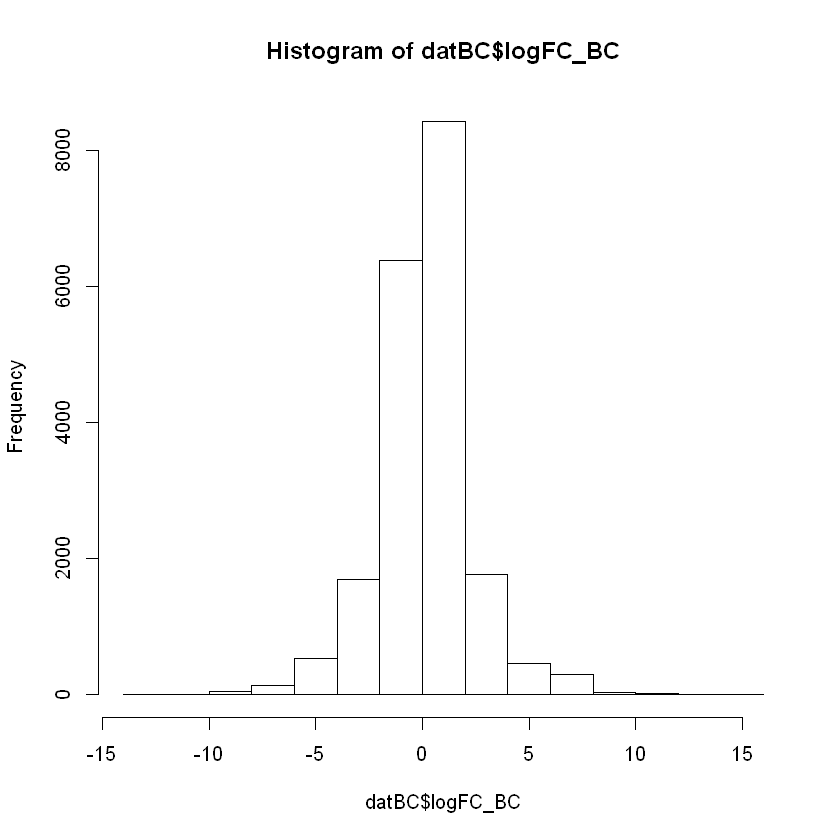

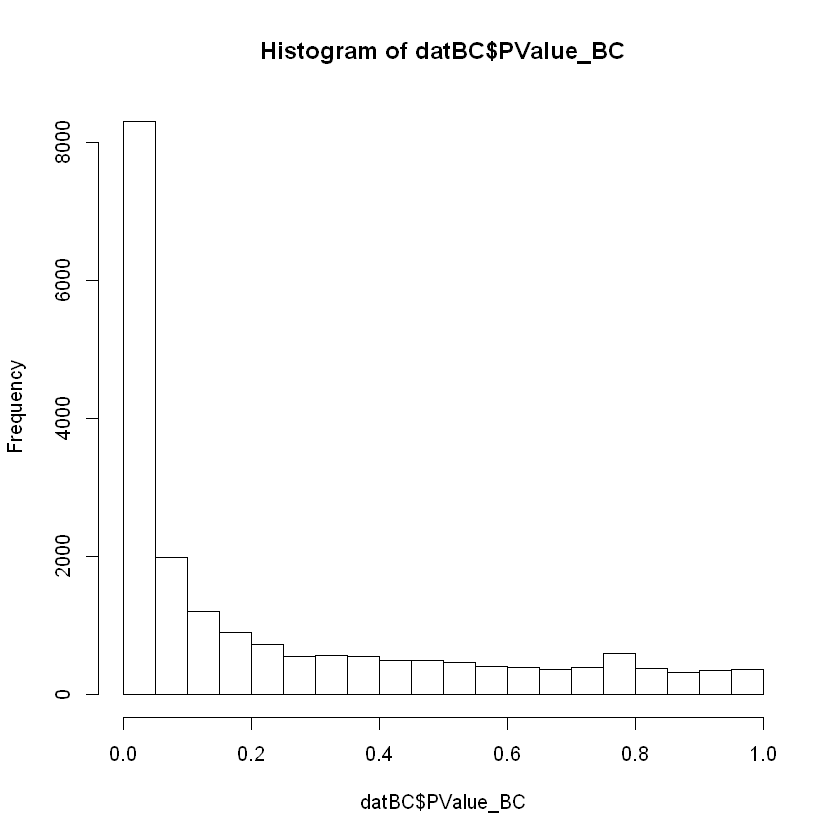

In [19]:
# breast cancer
datBC <- dataset[,-5:-18]
datBC <- na.omit(datBC)
hist(datBC$logFC_BC)
hist(datBC$PValue_BC)

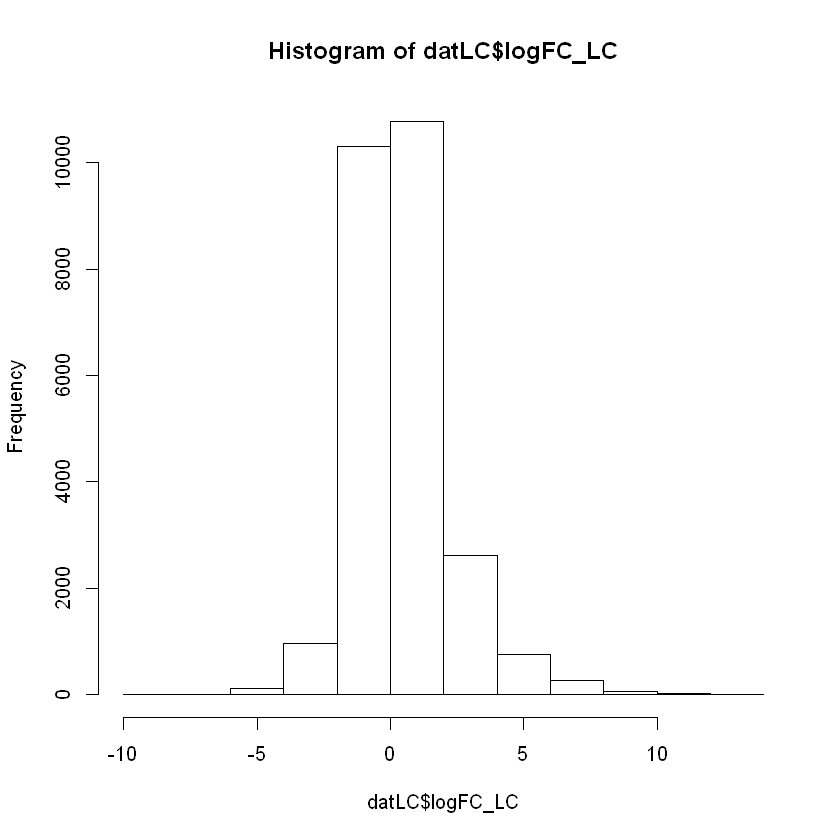

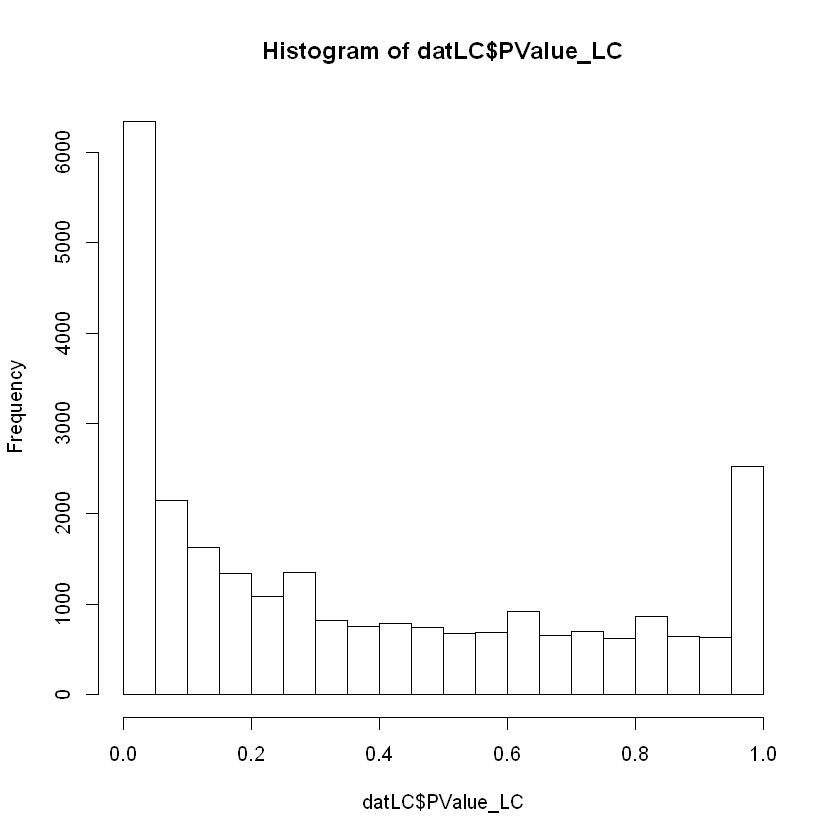

In [4]:
# lung cancer
datLC <- dataset[,c(-3,-4,-7:-18)]
datLC <- na.omit(datLC)
hist(datLC$logFC_LC)
hist(datLC$PValue_LC)

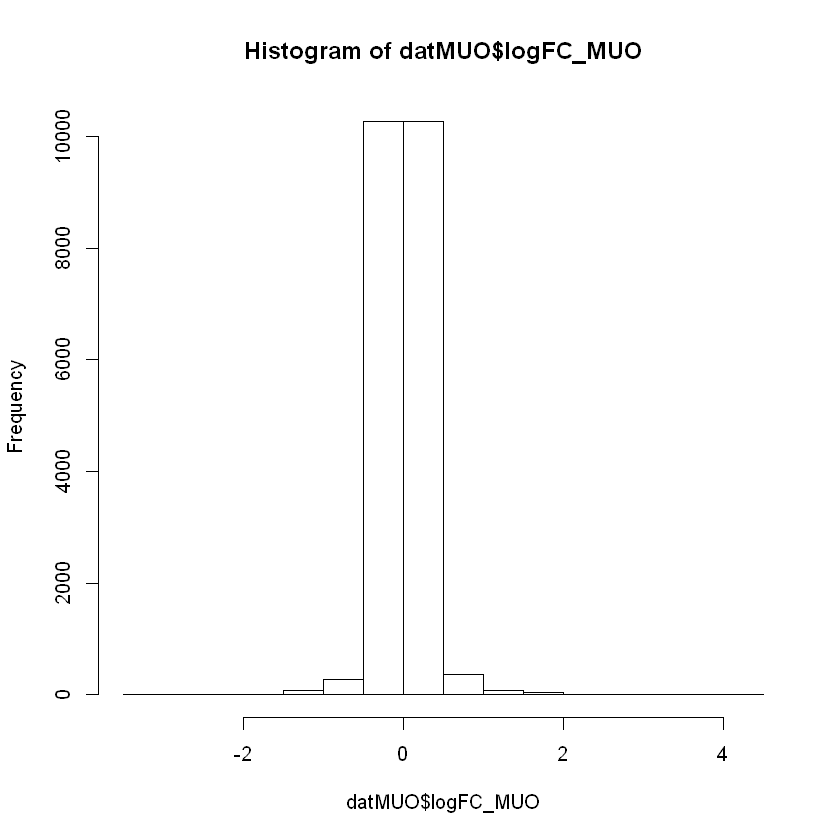

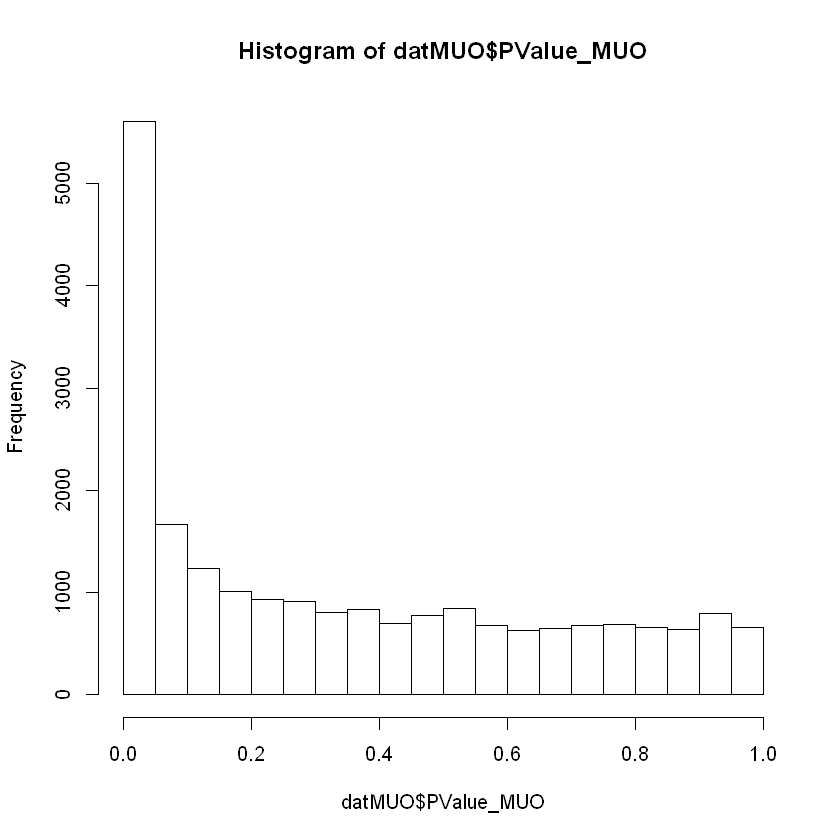

In [5]:
# metabolically unhealthy obese
datMUO <- dataset[,c(-2:-6,-9:-18)]
datMUO <- na.omit(datMUO)
hist(datMUO$logFC_MUO)
hist(datMUO$PValue_MUO)

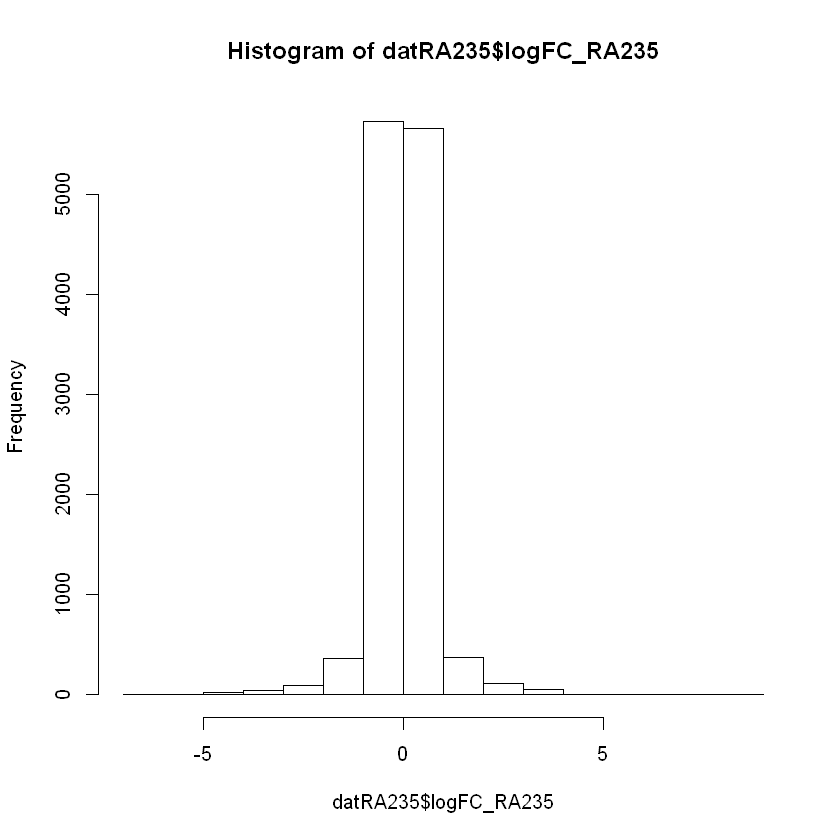

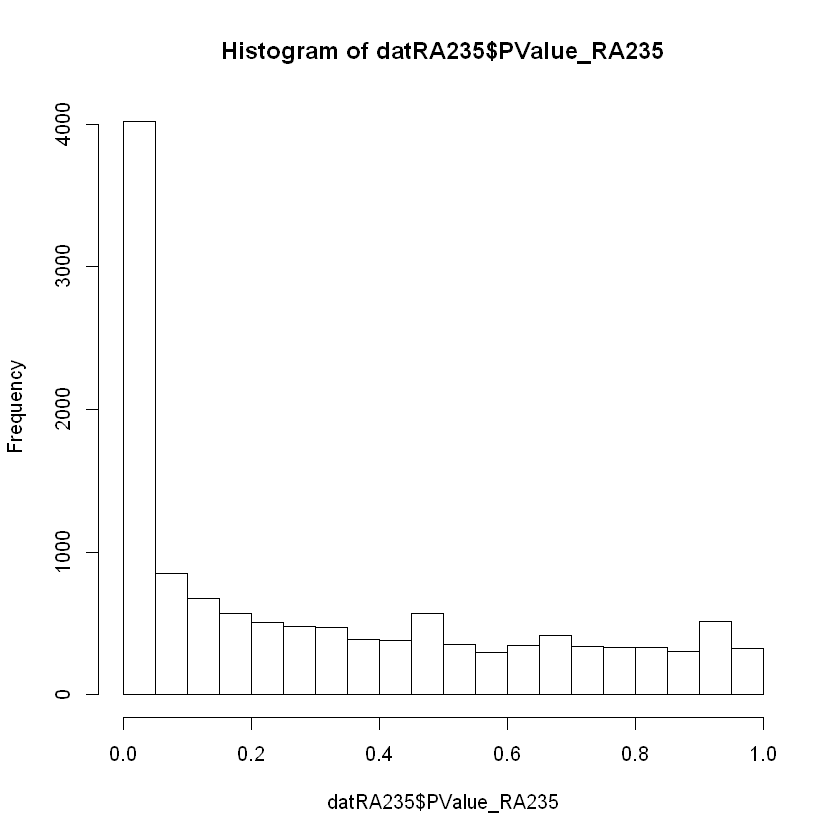

In [6]:
# rheumatoid arthritis
datRA235 <- dataset[,c(-2:-8,-11:-18)]
datRA235 <- na.omit(datRA235)
hist(datRA235$logFC_RA235)
hist(datRA235$PValue_RA235)

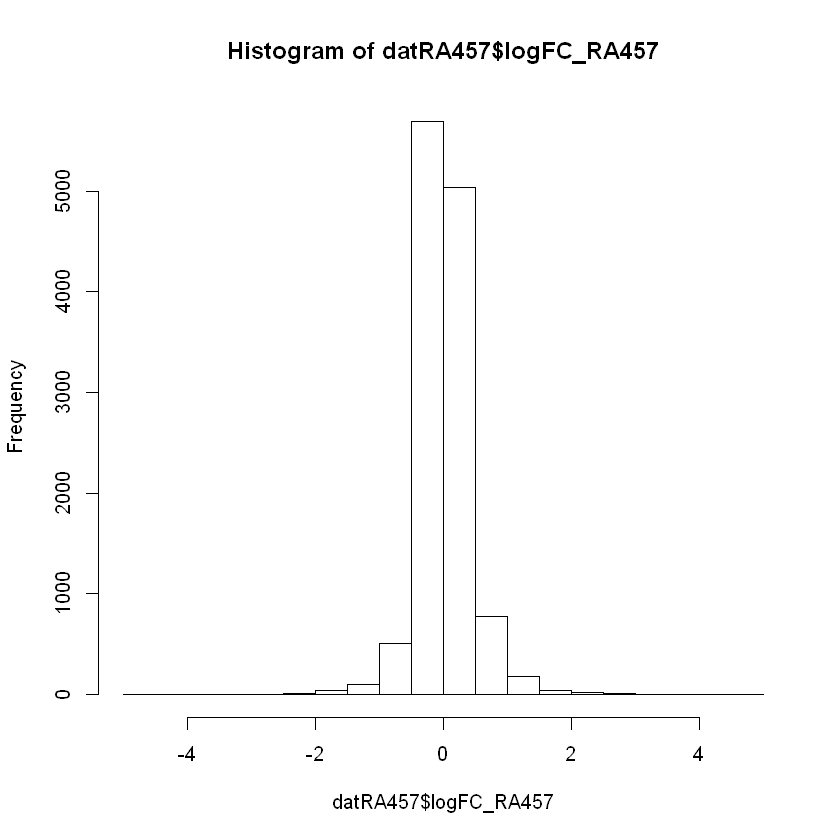

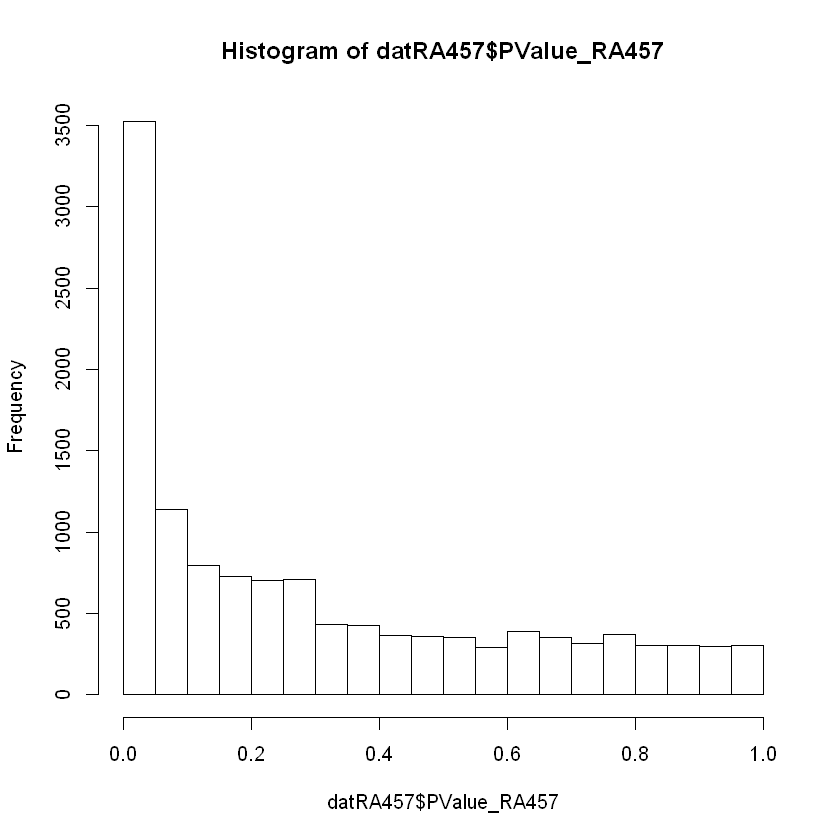

In [25]:
# rheumatoid arthritis
datRA457 <- dataset[,c(-2:-10,-13:-18)]
datRA457 <- na.omit(datRA457)
hist(datRA457$logFC_RA457)
hist(datRA457$PValue_RA457)

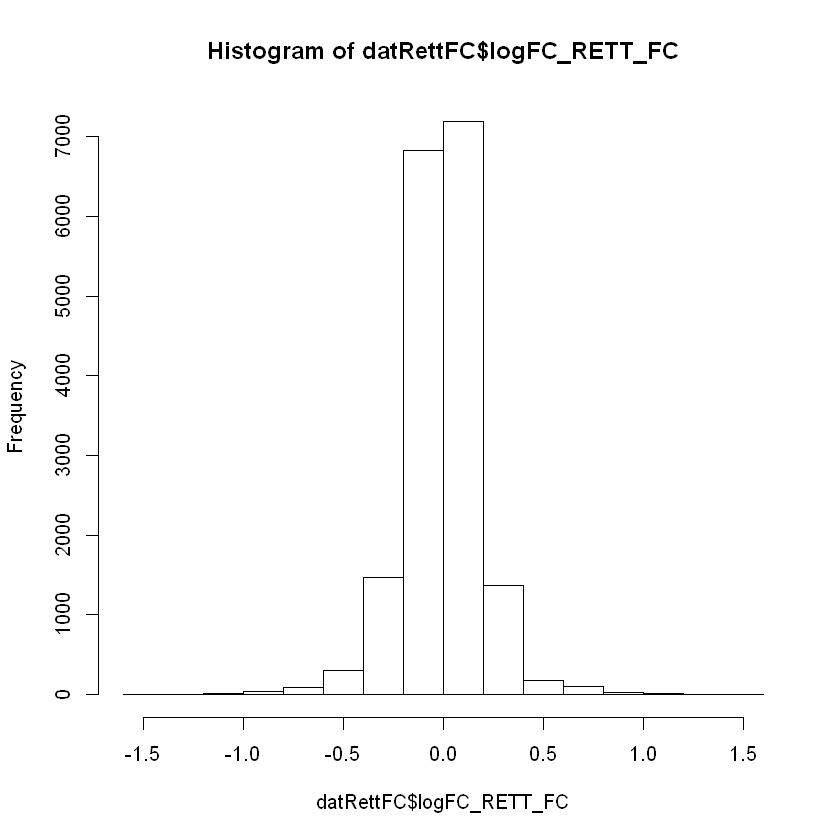

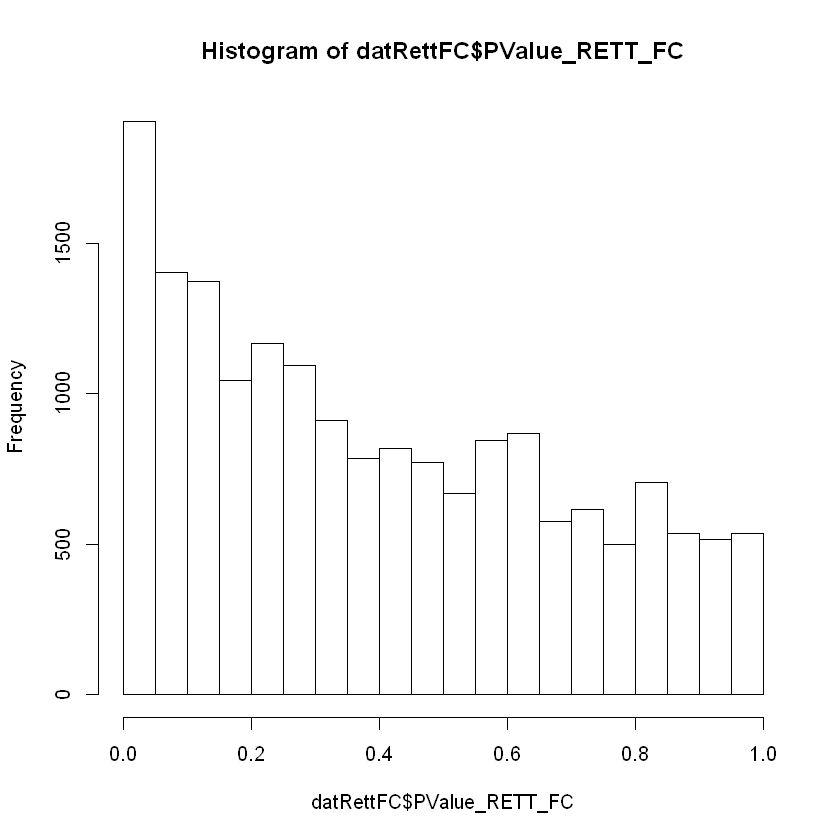

In [8]:
# Rett syndrome frontal cortex
datRettFC <- dataset[,c(-2:-12,-15:-18)]
datRettFC <- na.omit(datRettFC)
hist(datRettFC$logFC_RETT_FC)
hist(datRettFC$PValue_RETT_FC)

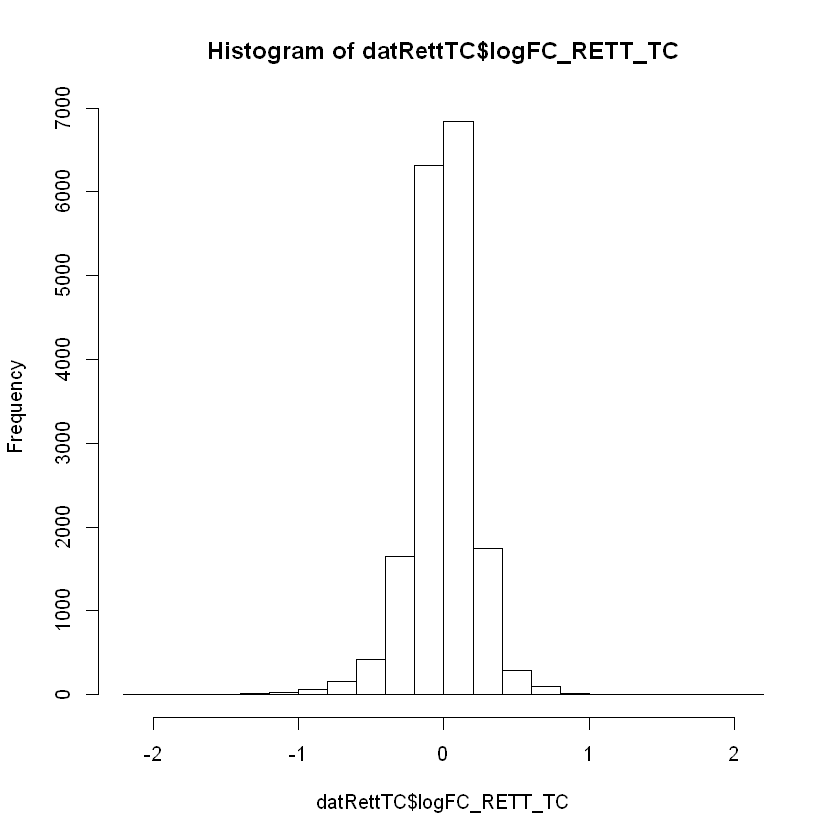

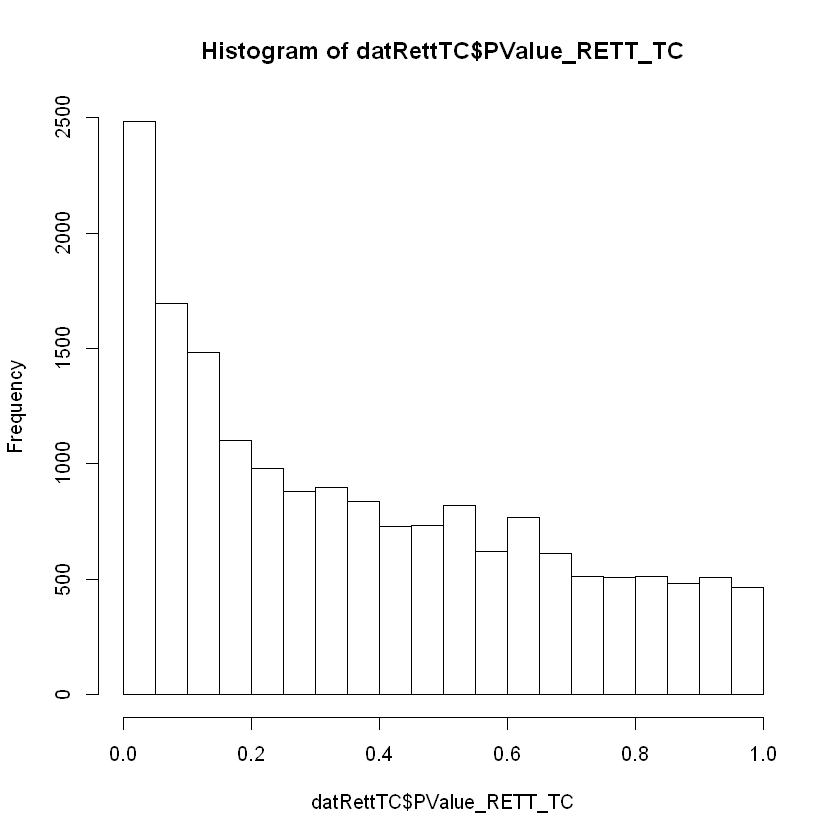

In [9]:
# Rett syndrome temporal cortex
datRettTC <- dataset[,c(-2:-14,-17:-18)]
datRettTC <- na.omit(datRettTC)
hist(datRettTC$logFC_RETT_TC)
hist(datRettTC$PValue_RETT_TC)

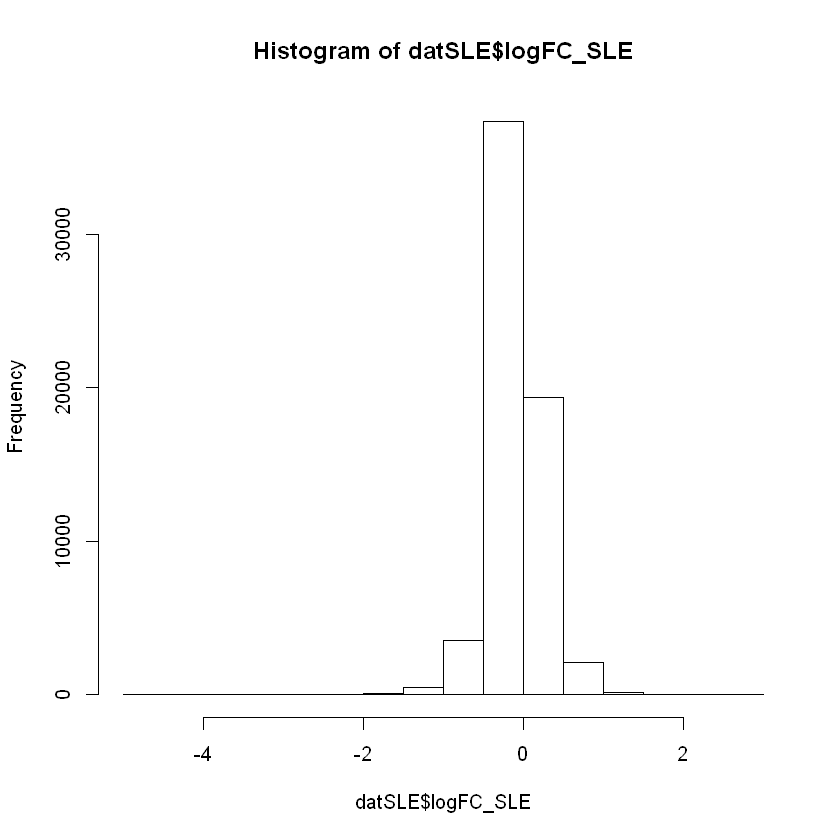

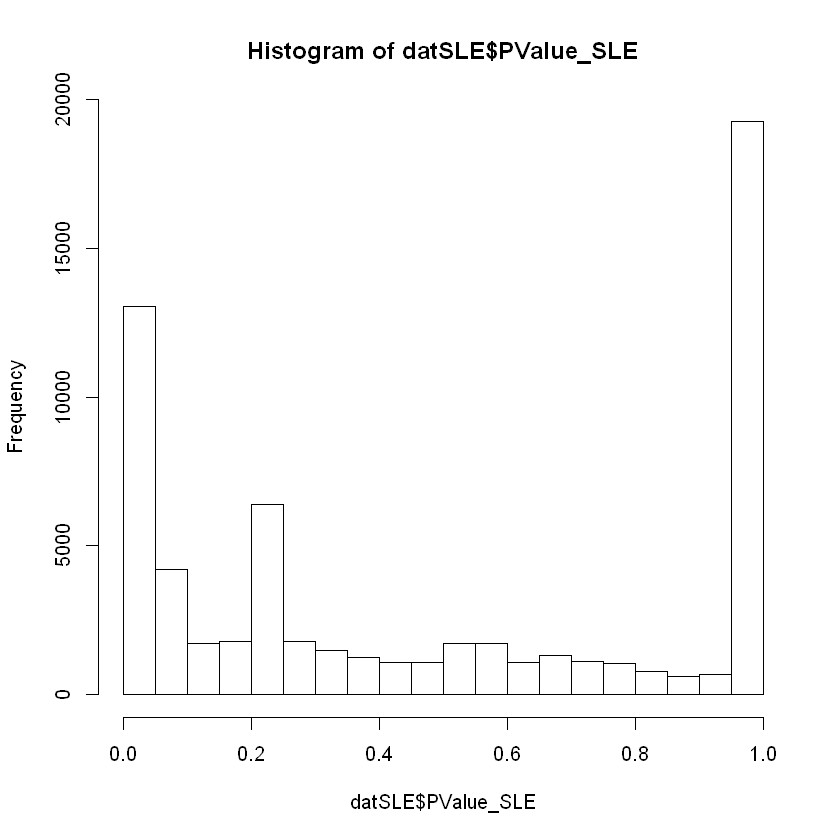

In [10]:
# systemic lupus erythematosus
datSLE <- dataset[,c(-2:-16)]
datSLE <- na.omit(datSLE)
hist(datSLE$logFC_SLE)
hist(datSLE$PValue_SLE)

For all datasets, the fold change is quite what we want to see. No datasets has high frequencies at the respective extremities. For the p.values however, we that systemic lupus erythematosus and lung cancer have a higher frequency of p.value = 1.0 compared to the other datasets and comapred to the other p.values within the dataset. Additionally, both datasets, frontal and temporal cortex, of the Rett syndrome have overall high frequencies, especially when compared to the other datasets. 

### Significant differentially expressed genes
It is interesting to see the number and percentage of significant differentially expressed genes per dataset. In this case we chose and log fold change lower than -0.58 and higher than 0.58.

So, let us check what these values are!

In [37]:
# breast cancer
datBC1 <- subset(datBC, datBC$logFC_BC <= -0.58)
datBC2 <- subset(datBC, datBC$logFC_BC >= 0.58)
datBC3 <- rbind(datBC1, datBC2)
nBC <- nrow(datBC3[datBC3$PValue_BC <= 0.05,])
print(paste0("The number of significant differentially expressed genes is ", nBC))
percBC <- (as.numeric(nBC) / as.numeric(nrow(datBC)) * 100)
percBC <- as.numeric(format(round(percBC, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percBC, "%"))

[1] "The number of significant differentially expressed genes is 8280"
[1] "The percentage of significant differentially expressed genes is 41.75%"


In [38]:
# lung cancer
datLC1 <- subset(datLC, datLC$logFC_LC <= -0.58)
datLC2 <- subset(datLC, datLC$logFC_LC >= 0.58)
datLC3 <- rbind(datLC1, datLC2)
nLC <- nrow(datLC3[datLC3$PValue_LC <= 0.05,])
print(paste0("The number of significant differentially expressed genes is ", nLC))
percLC <- (as.numeric(nLC) / as.numeric(nrow(datLC)) * 100)
percLC <- as.numeric(format(round(percLC, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percLC, "%"))

[1] "The number of significant differentially expressed genes is 6344"
[1] "The percentage of significant differentially expressed genes is 24.47%"


In [21]:
# metabolically unhealthy obese
datMUO1 <- subset(datMUO, datMUO$logFC_MUO <= -0.58)
datMUO2 <- subset(datMUO, datMUO$logFC_MUO >= 0.58)
datMUO3 <- rbind(datMUO1, datMUO2)
nMUO <- nrow(datMUO3[datMUO3$PValue_MUO <= 0.05,])
print(paste0("The number of significant differentially expressed genes is ", nMUO))
percMUO <- (as.numeric(nMUO) / as.numeric(nrow(datMUO)) * 100)
percMUO <- as.numeric(format(round(percMUO, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percMUO, "%"))

[1] "The number of significant differentially expressed genes is 645"
[1] "The percentage of significant differentially expressed genes is 3.02%"


In [40]:
# rheumatoid arthritis
datRA235_1 <- subset(datRA235, datRA235$logFC_RA235 <= -0.58)
datRA235_2 <- subset(datRA235, datRA235$logFC_RA235 >= 0.58)
datRA235_3 <- rbind(datRA235_1, datRA235_2)
nRA235 <- nrow(datRA235_3[datRA235_3$PValue_RA235 <= 0.05,])
print(paste0("The number of significant differentially expressed genes is ", nRA235))
percRA235 <- (as.numeric(nRA235) / as.numeric(nrow(datRA235)) * 100)
percRA235 <- as.numeric(format(round(percRA235, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percRA235, "%"))

[1] "The number of significant differentially expressed genes is 1984"
[1] "The percentage of significant differentially expressed genes is 15.95%"


In [41]:
# rheumatoid arthritis
datRA457_1 <- subset(datRA457, datRA457$logFC_RA457 <= -0.58)
datRA457_2 <- subset(datRA457, datRA457$logFC_RA457 >= 0.58)
datRA457_3 <- rbind(datRA457_1, datRA457_2)
nRA457 <- nrow(datRA457_3[datRA457_3$PValue_RA457 <= 0.05,])
print(paste0("The number of significant differentially expressed genes is ", nRA457))
percRA457 <- (as.numeric(nRA457) / as.numeric(nrow(datRA457)) * 100)
percRA457 <- as.numeric(format(round(percRA457, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percRA457, "%"))

[1] "The number of significant differentially expressed genes is 1027"
[1] "The percentage of significant differentially expressed genes is 8.26%"


In [42]:
# Rett syndrome frontal cortex
datRettFC1 <- subset(datRettFC, datRettFC$logFC_RETT_FC <= -0.58)
datRettFC2 <- subset(datRettFC, datRettFC$logFC_RETT_FC >= 0.58)
datRettFC3 <- rbind(datRettFC1, datRettFC2)
nRettFC <- nrow(datRettFC3[datRettFC3$PValue_RETT_FC <= 0.05,])
print(paste0("The number of significant differentially expressed genes is ", nRettFC))
percRettFC <- (as.numeric(nRettFC) / as.numeric(nrow(datRettFC)) * 100)
percRettFC <- as.numeric(format(round(percRettFC, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percRettFC, "%"))

[1] "The number of significant differentially expressed genes is 257"
[1] "The percentage of significant differentially expressed genes is 1.46%"


In [43]:
# Rett syndrome temporal cortex
datRettTC1 <- subset(datRettTC, datRettTC$logFC_RETT_TC <= -0.58)
datRettTC2 <- subset(datRettTC, datRettTC$logFC_RETT_TC >= 0.58)
datRettTC3 <- rbind(datRettTC1, datRettTC2)
nRettTC <- nrow(datRettTC3[datRettTC3$PValue_RETT_TC <= 0.05,])
print(paste0("The number of significant differentially expressed genes is ", nRettTC))
percRettTC <- (as.numeric(nRettTC) / as.numeric(nrow(datRettTC)) * 100)
percRettTC <- as.numeric(format(round(percRettTC, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percRettTC, "%"))

[1] "The number of significant differentially expressed genes is 376"
[1] "The percentage of significant differentially expressed genes is 2.13%"


In [44]:
# systemic lupuc erythematosus
datSLE1 <- subset(datSLE, datSLE$logFC_SLE <= -0.58)
datSLE2 <- subset(datSLE, datSLE$logFC_SLE >= 0.58)
datSLE3 <- rbind(datSLE1, datSLE2)
nSLE <- nrow(datSLE3[datSLE3$PValue_SLE <= 0.05,])
print(paste0("The number of significant differentially expressed genes is ", nSLE))
percSLE <- (as.numeric(nSLE) / as.numeric(nrow(datSLE)) * 100)
percSLE <- as.numeric(format(round(percSLE, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percSLE, "%"))

[1] "The number of significant differentially expressed genes is 4016"
[1] "The percentage of significant differentially expressed genes is 6.36%"


### Clear visualization
Now we have these values, let's put them into a data frame so it is easily to read!

In [139]:
# create data frame from significant differentially expressed genes and percentage of these genes
sigGenes <- c(nBC, nLC, nMUO, nRA235, nRA457, nRettFC, nRettTC, nSLE)
percGenes <- c(paste0(percBC, "%"), paste0(percLC, "%"), 
              paste0(percMUO, "%"), paste0(percRA235, "%"), paste0(percRA457, "%"), 
              paste0(percRettFC, "%"), paste0(percRettTC, "%"), paste0(percSLE, "%"))
Disease <- c("Breast cancer", "Lung cancer", "MUO", "Rheumatoid arthritis 235",
                                                    "Rheumatoid arthritis 457", "Rett FC", "Rett TC", "SLE")
df <- data.frame(Disease, sigGenes, percGenes)
colnames(df)[c(2,3)] <- c("Significant Genes (n)", "Percentage Significant Genes")

# save data frame as text file
write.table(df, file.path(getwd(), "Results", "sigGenes.txt"), sep = "\t", row.names = F, quote = F)

# make data frame a visually nice table
df <- formattable(df, align = c("l", "c", "r"), list(Disease = formatter("span", style = ~ style(font.weight = "bold"))))

# view table
df

Disease,Significant Genes (n),Percentage Significant Genes
Breast cancer,8280,41.75%
Lung cancer,6344,24.47%
MUO,645,3.02%
Rheumatoid arthritis 235,1984,15.95%
Rheumatoid arthritis 457,1027,8.26%
Rett FC,257,1.46%
Rett TC,376,2.13%
SLE,4016,6.36%


To look easier at the percentage of significant differentially expressed genes, and compare these values easier between the different datasets, we should make a barplot out of these values. 

jpeg 
   3

png 
  2

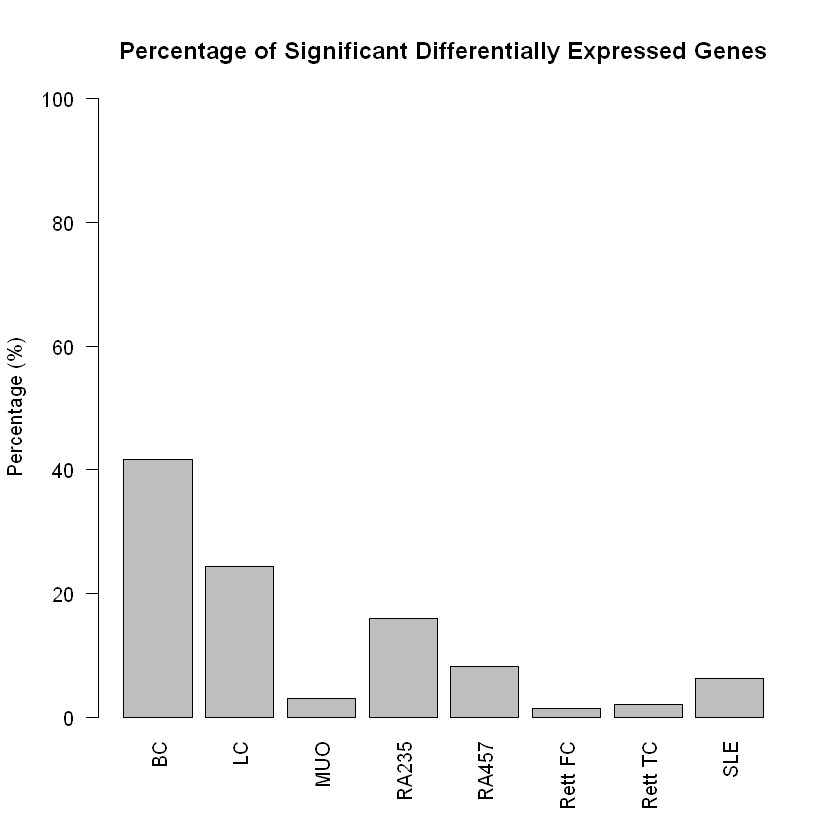

In [118]:
# create barplot of percentage of significant differentially expressed genes
x <- as.numeric(c(percBC, percLC, percMUO, percRA235, percRA457, percRettFC, percRettTC, percSLE))
y <- c("BC", "LC", "MUO", "RA235", "RA457", "Rett FC", "Rett TC", "SLE")
bar_plot <- barplot(x, main = "Percentage of Significant Differentially Expressed Genes",
        names.arg = c(y), ylab = "Percentage (%)",
        ylim = c(0,100), las = 2)

# save boxplot as image
dev.copy(jpeg, filename = file.path(getwd(),"Results", "barplot_percSigGenes.jpg"));
dev.off ();

It is important to note that these percentages don't represent the perfecentage of significant differentially expressed genes of the _whole genome_. Rather these percentages indicate the significant differentially expressed genes of the _total number of genes measured_ by the respective method used. 